# Continuous Training using ensemble networks


Artificial Neural Networks classifying together by vote and ensuring robustness by correcting each other. 

# What technical Background needed to be established?

- Feed Forward Neural Networks
    - Perceptron
    - Layers
    - Activation functions
    - Gradient Descent
    - Optimizers
- Deep learning
- Convolutional Neural Networks
    - Convolution
    - Pooling
- Ensemble Networks
- Transfer Learning
- Data Preprocessing

# Continuous Ensemble Training

## Theoretical Framework

- Check feasibility of the method by looking at the case-probability distribution
- the difference between 3 and 5 network ensemble
    - 5's postrain is more skewed
    - 3's dont have the case of no prediction

- discuss the 5 networks total-case-plot
    - from which point on is method effective: ~70%
        - at this point the case of no prediction is still high
        - indicates a lot of hand labelling which is fine
        - very good networks on complex tasks with a lot of classes may only have 80 % accuracy

    - most postrain data collected: ~80%
        - Because no prediction is far less common and negtrain & allwrong fade out

    - end game: >90%
        - postrain declines due to exponential growth of allright
        - chance of no prediction below 10%
        - postrain chance at 95% acc is still 20% while noprediction is 2%
        - chances of negtrain & allwrong below 0.5%

- Looks good on paper Lets see how this translates into the real world

## MNIST Dataset

- Presentation of the hard facts of the dataset
- The easiest to present our method
- Executed preprocessing
- Choosen augmentation for the simulation of a changing real world environment
- Different test datasets generators for the different stages of the training

## Methodology

- Pre training
- majority vote
- Cycle outline
   - small learning rate
       - halved compared to normal training
       
   - batch size 1
       - stochastic gradient descent when data is heterogenous
       - especially in the end game the continuous training data consists of edge cases that are not well represented by averaging over their gradients. They have to be individually represented
       
   - datapoints per cycle
       - Depends on use case. How often is it even possible to retrain?
       - in mid game a lot of data is missed. Many per cycles means a lot of hand labour.
       - in end game datapoints per cycle can be higher due to less missed data
       - Maybe introduce a threshold of data collected that start continuous training
       
- Interesting cases to look at
    - running 100000 datapoints at different accs
        - and check that with the theoretical framework
        
    - slight augmentation.
        - how many cycles until ensemble adapted?
        
    - Hard augmentation
        - How many cycles until ensemble adapted?
        
    - Plot rotation x cycles till adaption:
        - How does the relation look like?
        - Is there an optimal point?
        
    - step wise increased augmentation
        - Check if ensemble accuracy is stable
        - the influence of datapoints per cycle

## Results

- Proven increase of the accuracy of the ensemble
- Show the plots of the collected data over the cycles

# Conclusion

## Discussion

- Analysis of the evolution of the collected data per cycle
- Data collection matching the theoretical Framework
- ...

## Outlook

- Nur letzte layer nachtrainieren, vor allem bei großeren Netzwerken.
- Die implementierung eines threshold unter dem der output eines netzwerkes eine extra klasse die unsicherheit ausdrückt ist. In diesem Fall, würde das Netzwerk nachtrainiert. Die soll eine Entscheidung, die auf einer Mehrzahl von low probability predictions getätigt wird, verhindern.
- Dahingehend, kann man auch ein average aus den predictions ziehen und alle unter dem threshold nachtrainieren.
- Wenn eine Entscheidung kollektiv mit niedriger wahrscheinlichkeit getätigt wurde, sollte diese auch händisch geprüft werden.
- Generell fehlt auch noch die anwendung des händischen prüfens und die auswertung wie sehr dies den trainingsverlauf beeinflusst.
- Der vergleich der anpassungsfähigkeit des ensembles bei einer stetig steigenden augmentation und einer harten augmentation.

# Let's have a quick look at examples of the discussed plots

## Theoretical Framework plots

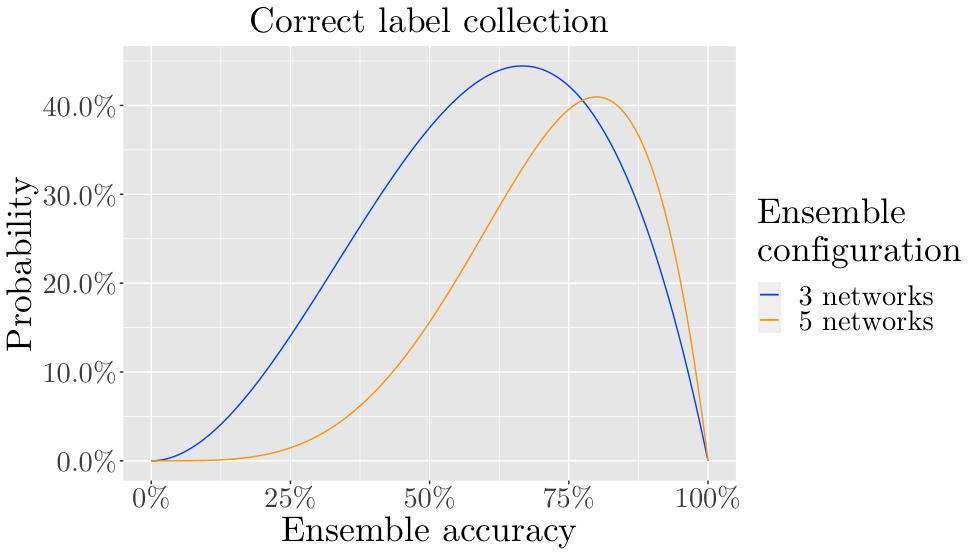

In [14]:
from IPython import display
display.Image("../plots/modelcount.png")

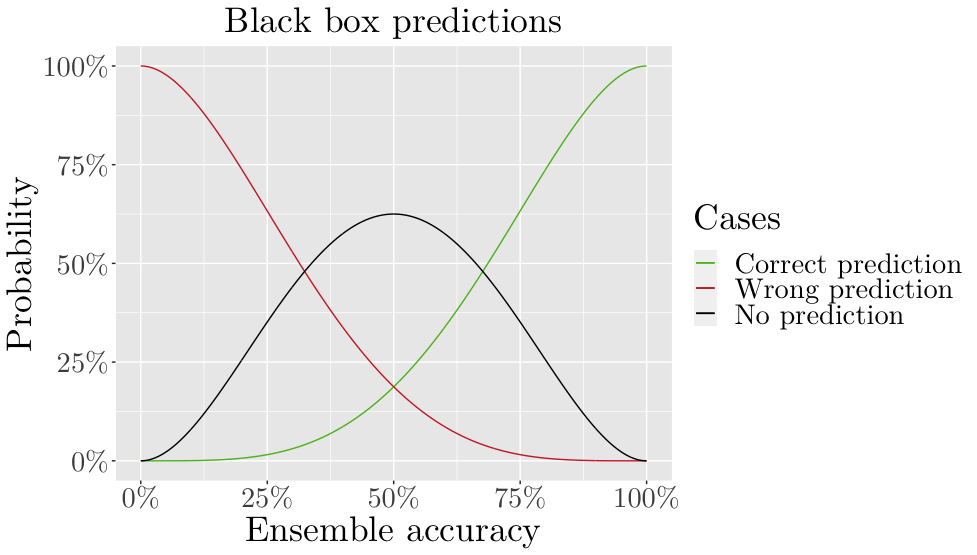

In [16]:
display.Image('../plots/pred.png')

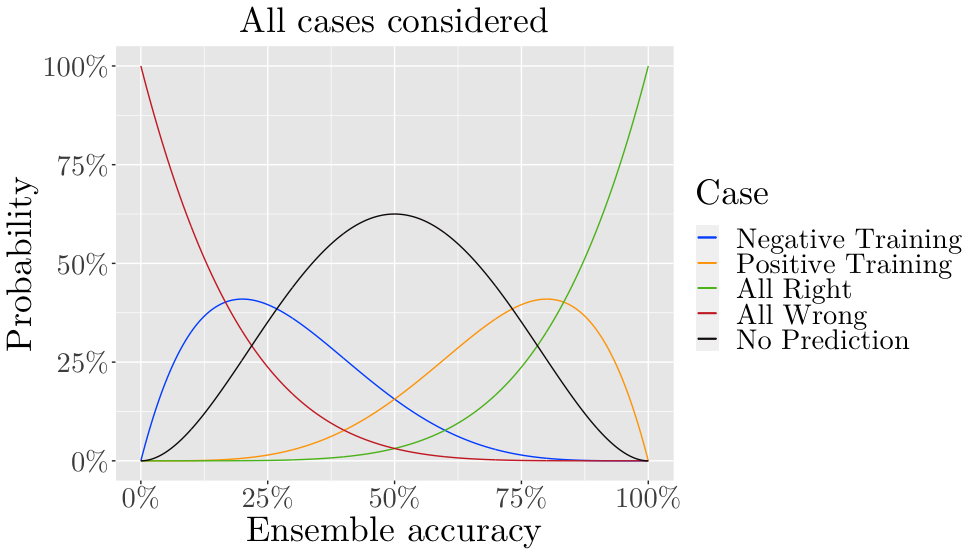

In [17]:
display.Image('../plots/all.png')

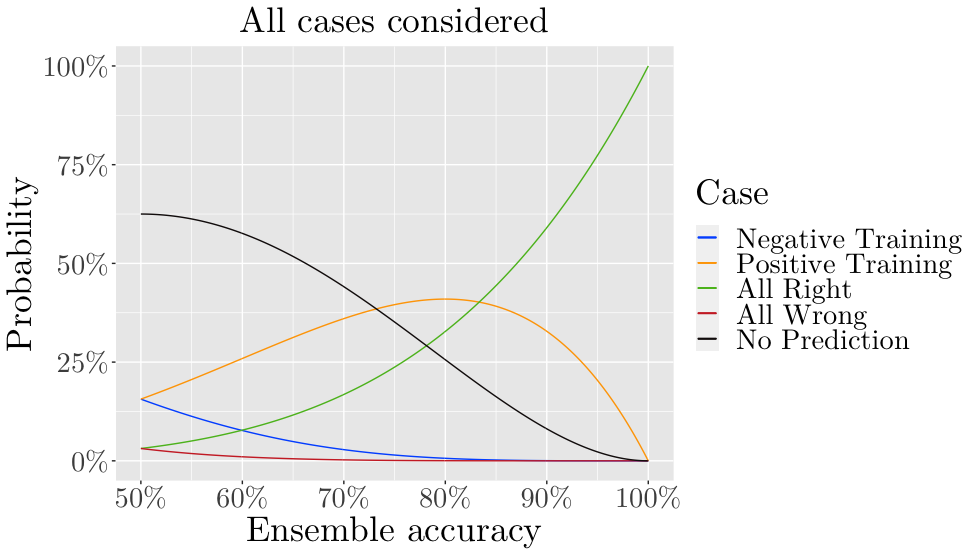

In [18]:
display.Image('../plots/all_zoom.png')

## Continuous Ensemble Training Cycles

Cycle:  0


2022-03-29 16:30:31.200609: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1117.0 collected datapoints labeled correct
249.0 collected datapoints were labeled wrong
1043 datapoints were not classified.


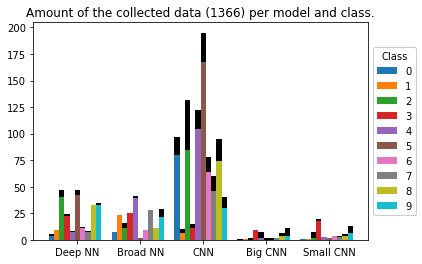

Cycle:  1
2087.0 collected datapoints labeled correct
365.0 collected datapoints were labeled wrong
1096 datapoints were not classified.


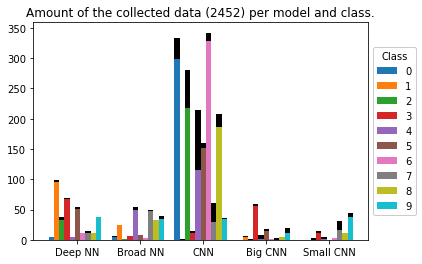

Cycle:  2
1676.0 collected datapoints labeled correct
449.0 collected datapoints were labeled wrong
783 datapoints were not classified.


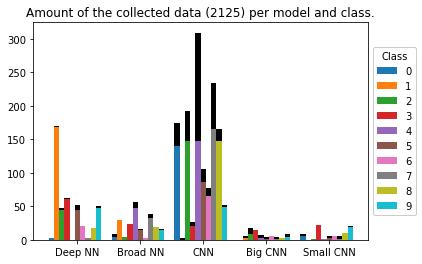

Cycle:  3
1816.0 collected datapoints labeled correct
464.0 collected datapoints were labeled wrong
725 datapoints were not classified.


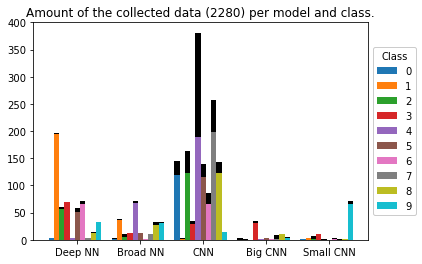

Cycle:  4
2034.0 collected datapoints labeled correct
478.0 collected datapoints were labeled wrong
653 datapoints were not classified.


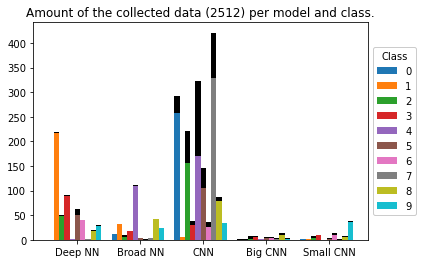

In [21]:
utils.plot_cycles(ensemble, "Run02")

#### The Ensemble accuracy after every Model training per cycle

In [22]:
accloss02 = np.load('../continuous_training_data/Run02_accloss.npz')
pd.DataFrame(accloss02['ensemble_accuracies'],
             columns=['Model_'+str(i) for i in range(accloss02['ensemble_accuracies'].shape[1])]).head(accloss02['ensemble_accuracies'].shape[1])

,Model_0,Model_1,Model_2,Model_3,Model_4
0,0.785621,0.798920,0.788521,0.788621,0.787221
1,0.790821,0.797720,0.797720,0.809219,0.806519
2,0.816118,0.813619,0.818518,0.811319,0.815618
3,0.823318,0.826417,0.824818,0.828517,0.834017
4,0.828017,0.833717,0.830017,0.836416,0.839216


#### The model accuracy after every training per cycle

In [23]:
mta = accloss02['models_test_accuracies'][:,:,-1]
pd.DataFrame(mta,
             columns=['Model_'+str(i) for i in range(mta.shape[1])]).head(mta.shape[1])

,Model_0,Model_1,Model_2,Model_3,Model_4
0,0.786121,0.801420,0.721328,0.860114,0.875912
1,0.790721,0.820218,0.773823,0.882612,0.876212
2,0.803120,0.820118,0.779622,0.889211,0.867013
3,0.810719,0.826617,0.782822,0.896310,0.877812
4,0.820618,0.834317,0.736826,0.898510,0.889811
